In [1]:
#SOLUTION: 1

def highest_frequency_word_length(string):
    words = string.split()
    frequency = {}
    for word in words:
        if word not in frequency:
            frequency[word] = 1
        else:
            frequency[word] += 1
    max_frequency = max(frequency.values())
    max_frequency_word = max(frequency, key=frequency.get)
    return len(max_frequency_word) if max_frequency > 1 else None

string = "write write write all the number from from from 1 to 100"
print(highest_frequency_word_length(string))

5


In [2]:
#SOLUTION: 2

def isValid(s):
    freq = {}
    for i in s:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    values = list(freq.values())
    values.sort()
    min_val = values[0]
    max_val = values[-1]
    if min_val == max_val or (max_val - min_val == 1 and values.count(max_val) == -1) or (min_val == 1 and values.count(min_val) == 1 and values.count(max_val) == len(values) - 1):
        return "YES"
    else:
        return "NO"
    
#Here we have some 'Test Cases':
print(isValid("abc")) # Output: YES
print(isValid("abcc")) # Output: NO

#Some Additional Test Cases are:
print(isValid("aabbcc")) # Output: YES
print(isValid("aabbccc")) # Output: No
print(isValid("aabbc")) # Output: YES

YES
NO
YES
NO
YES


In [69]:
#SOLUTION: 3
import pandas as pd
import requests

# Download data from provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = json.loads(response.text)

# Extract relevant data from JSON object
pokemon_data = []
for pokemon in data["pokemon"]:
    pokemon_dict = {
        "id": pokemon["id"],
        "num": pokemon["num"],
        "name": pokemon["name"],
        "img": pokemon["img"],
        "type": ", ".join(pokemon["type"]),
        "height": pokemon["height"],
        "weight": pokemon["weight"],
        "candy": pokemon.get("candy", ""),
        "candy_count": pokemon.get("candy_count", ""),
        "egg": pokemon.get("egg", ""),
        "spawn_chance": pokemon.get("spawn_chance", ""),
        "avg_spawns": pokemon.get("avg_spawns", ""),
        "spawn_time": pokemon.get("spawn_time", ""),
        "multipliers": pokemon.get("multipliers", []),
        "weaknesses": pokemon.get("weaknesses", [])
    }
    if "next_evolution" in pokemon:
        for evolution in pokemon["next_evolution"]:
            pokemon_dict[f"next_evolution_{evolution['num']}"] = evolution["name"]
    if "prev_evolution" in pokemon:
        for evolution in pokemon["prev_evolution"]:
            pokemon_dict[f"prev_evolution_{evolution['num']}"] = evolution["name"]
    pokemon_data.append(pokemon_dict)

# Convert data to pandas dataframe
df = pd.DataFrame(pokemon_data)

# Write pandas dataframe to Excel file
df.to_excel("output.xlsx", index=False)

print(df)

      id  num        name                                               img  \
0      1  001   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2  002     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3  003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4  004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5  005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

               type  height    weight             c

In [14]:
#SOLUTION: 4

import requests

# Downloading data from the URL
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)

# Converting JSON data to a DataFrame
data = pd.read_json(json.dumps(response.json()))

# Converting DataFrame to CSV file
data.to_csv("output.csv", index=False)

# Reading the CSV file into a DataFrame
df = pd.read_csv("output.csv")

# Displaying the first 5 rows of the DataFrame
print(df.head())

       name   id nametype     recclass      mass  fall  \
0    Aachen    1    Valid           L5      21.0  Fell   
1    Aarhus    2    Valid           H6     720.0  Fell   
2      Abee    6    Valid          EH4  107000.0  Fell   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell   
4   Achiras  370    Valid           L6     780.0  Fell   

                      year    reclat    reclong  \
0  1880-01-01T00:00:00.000  50.77500    6.08333   
1  1951-01-01T00:00:00.000  56.18333   10.23333   
2  1952-01-01T00:00:00.000  54.21667 -113.00000   
3  1976-01-01T00:00:00.000  16.88333  -99.90000   
4  1902-01-01T00:00:00.000 -33.16667  -64.95000   

                                         geolocation  \
0  {'type': 'Point', 'coordinates': [6.08333, 50....   
1  {'type': 'Point', 'coordinates': [10.23333, 56...   
2  {'type': 'Point', 'coordinates': [-113, 54.216...   
3  {'type': 'Point', 'coordinates': [-99.9, 16.88...   
4  {'type': 'Point', 'coordinates': [-64.95, -33....   

   :@co

In [12]:
#SOLUTION: 5

import requests

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

response = requests.get(url)

data = response.json()

for episode in data["_embedded"]["episodes"]:
    id = episode["id"]
    name = episode["name"]
    season = episode["season"]
    number = episode["number"]
    type = episode["type"]
    airdate = episode["airdate"]
    airtime = episode["airtime"]
    runtime = episode["runtime"]
    rating = episode["rating"]["average"]
    summary = episode["summary"].replace("<p>", "").replace("</p>", "")
    medium_image_link = episode["image"]["medium"]
    original_image_link = episode["image"]["original"]

    print(f"ID: {id}")
    print(f"Name: {name}")
    print(f"Season: {season}")
    print(f"Number: {number}")
    print(f"Type: {type}")
    print(f"Airdate: {airdate}")
    print(f"Airtime: {airtime}")
    print(f"Runtime: {runtime}")
    print(f"Average Rating: {rating}")
    print(f"Summary: {summary}")
    print(f"Medium Image Link: {medium_image_link}")
    print(f"Original Image Link: {original_image_link}\n")

ID: 869671
Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg

ID: 911201
Name: Chestnut
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Average Rating: 7.7
Summary: Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.
Medium Image Link: https://static.tvmaze.com/

In [22]:
#SOLUTION: 6

import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)
data = response.json()

df = pd.json_normalize(data['pokemon'])

print('All Pokemons:')
print(df)

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df['spawn_chance'] < 5]

print('Pokemons whose spawn rate is less than 5%:')
print(spawn_rate_less_than_5)

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df['weaknesses'].apply(len) < 4]

print('Pokemons that have less than 4 weaknesses:')
print(less_than_4_weaknesses)

# Get all Pokemons that have no multipliers at all
no_multipliers = df[df['multipliers'].apply(len) == 0]

print('Pokemons that have no multipliers at all:')
print(no_multipliers)

# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df['next_evolution'].apply(lambda x: len(x) if x else 0) < 2]

print('Pokemons that do not have more than 2 evolutions:')
print(less_than_2_evolutions)

# Get all Pokemons whose spawn time is less than 300 seconds.
spawn_time_less_than_300 = df[df['spawn_time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])) < 300]

print('Pokemons whose spawn time is less than 300 seconds:')
print(spawn_time_less_than_300)

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df['type'].apply(len) > 1]

print('Pokemon who have more than two types of capabilities:')
print(more_than_2_types)


All Pokemons:
      id  num        name                                               img  \
0      1  001   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2  002     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3  003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4  004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5  005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

                 type  height    weig

TypeError: object of type 'NoneType' has no len()

In [21]:
#SOLUTION: 7

import requests
import json
import pandas as pd

# Downloading data from the URL
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)

# Converting JSON data to a DataFrame
data = pd.read_json(json.dumps(response.json()))

# Converting DataFrame to CSV file
data.to_csv("output.csv", index=False)

# Reading the CSV file into a DataFrame
df = pd.read_csv("output.csv")

# Displaying the first 5 rows of the DataFrame
print(df.head())

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[(df['fall'] == 'Fell') & (df['year'] < 2000) & (df['recclass'] != 'Unknown')]

print('All Earth meteorites that fell before the year 2000:')
print(earth_meteorites_before_2000)

# Get all the earth meteorites co-ordinates who fell before the year 1970
earth_meteorites_coordinates_before_1970 = df[(df['fall'] == 'Fell') & (df['year'] < 1970) & (df['recclass'] != 'Unknown')][['name', 'id', 'recclass', 'mass', 'year', 'reclat', 'reclong']]

print('All Earth meteorites coordinates that fell before the year 1970:')
print(earth_meteorites_coordinates_before_1970)

# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
earth_meteorites_mass_more_than_10000kg = df[(df['mass'].notnull()) & (df['mass'] > 10000) & (df['recclass'] != 'Unknown')]

print('All Earth meteorites whose mass was more than 10000kg:')
print(earth_meteorites_mass_more_than_10000kg)



       name   id nametype     recclass      mass  fall  \
0    Aachen    1    Valid           L5      21.0  Fell   
1    Aarhus    2    Valid           H6     720.0  Fell   
2      Abee    6    Valid          EH4  107000.0  Fell   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell   
4   Achiras  370    Valid           L6     780.0  Fell   

                      year    reclat    reclong  \
0  1880-01-01T00:00:00.000  50.77500    6.08333   
1  1951-01-01T00:00:00.000  56.18333   10.23333   
2  1952-01-01T00:00:00.000  54.21667 -113.00000   
3  1976-01-01T00:00:00.000  16.88333  -99.90000   
4  1902-01-01T00:00:00.000 -33.16667  -64.95000   

                                         geolocation  \
0  {'type': 'Point', 'coordinates': [6.08333, 50....   
1  {'type': 'Point', 'coordinates': [10.23333, 56...   
2  {'type': 'Point', 'coordinates': [-113, 54.216...   
3  {'type': 'Point', 'coordinates': [-99.9, 16.88...   
4  {'type': 'Point', 'coordinates': [-64.95, -33....   

   :@co

TypeError: '<' not supported between instances of 'str' and 'int'

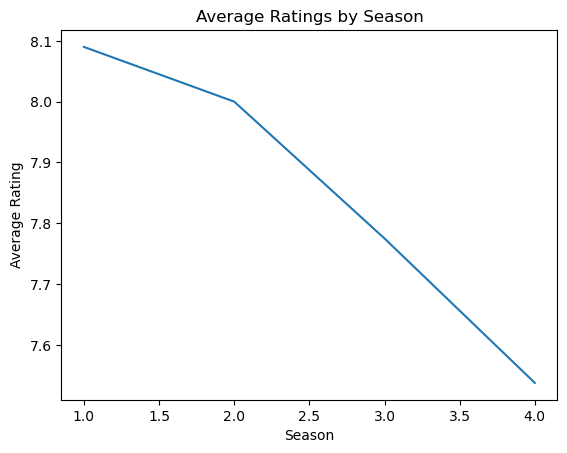

All episodes with an average rating greater than 8:
                         name  season  rating
0                The Original       1     8.0
1                    Chestnut       1     7.7
2                   The Stray       1     7.6
3           Dissonance Theory       1     7.9
4                 Contrapasso       1     8.0
5               The Adversary       1     8.0
6               Trompe L'Oeil       1     8.6
7                 Trace Decay       1     7.9
8   The Well-Tempered Clavier       1     8.5
9          The Bicameral Mind       1     8.7
10         Journey Into Night       2     7.8
11                    Reunion       2     7.7
12            Virtù e Fortuna       2     7.7
13   The Riddle of the Sphinx       2     8.0
14               Akane No Mai       2     7.6
15                Phase Space       2     7.7
16               Les Écorchés       2     7.9
17                    Kiksuya       2     8.7
18            Vanishing Point       2     8.4
19              The Passenge

In [23]:
#SOLUTION: 8

import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Creating a list of dictionaries to store episode information
episodes = []

for episode in data["_embedded"]["episodes"]:
    id = episode["id"]
    name = episode["name"]
    season = episode["season"]
    number = episode["number"]
    type = episode["type"]
    airdate = episode["airdate"]
    airtime = episode["airtime"]
    runtime = episode["runtime"]
    rating = episode["rating"]["average"]
    summary = episode["summary"].replace("<p>", "").replace("</p>", "")
    medium_image_link = episode["image"]["medium"]
    original_image_link = episode["image"]["original"]

    # Adding each episode's information to the list of episodes
    episodes.append({
        "id": id,
        "name": name,
        "season": season,
        "number": number,
        "type": type,
        "airdate": airdate,
        "airtime": airtime,
        "runtime": runtime,
        "rating": rating,
        "summary": summary,
        "medium_image_link": medium_image_link,
        "original_image_link": original_image_link
    })

# Converting the list of episodes to a Pandas DataFrame
df = pd.DataFrame(episodes)

# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
season_ratings = df.groupby('season')['rating'].mean()
plt.plot(season_ratings.index, season_ratings.values)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Season')
plt.show()

# Get all the episode names, whose average rating is more than 8 for every season
high_rated_episodes = df[df.groupby(['season'])['rating'].transform(max) > 8][['name', 'season', 'rating']]
print('All episodes with an average rating greater than 8:')
print(high_rated_episodes)

# Get all the episode names that aired before May 2019
episodes_before_may_2019 = df[df['airdate'] < '2019-05-01'][['name', 'airdate']]
print('All episodes that aired before May 2019:')
print(episodes_before_may_2019)

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes_by_season = df.loc[df.groupby(['season'])['rating'].idxmax()][['name', 'season', 'rating']]
lowest_rated_episodes_by_season = df.loc[df.groupby(['season'])['rating'].idxmin()][['name', 'season', 'rating']]
print('Highest rated episodes by season:')
print(highest_rated_episodes_by_season)
print('\nLowest rated episodes by season:')
print(lowest_rated_episodes_by_season)

# Get the summary for the most popular (ratings) episode in every season
most_popular_episodes_by_season = df.loc[df.groupby(['season'])['rating'].idxmax()][['name', 'season', 'summary']]
print('Most popular episodes by season:')
print(most_popular_episodes_by_season)


In [37]:
#SOLUTION: 9

import pandas as pd
import matplotlib.pyplot as plt

# Read data from the given link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Draw plots to show the distribution between city and electric vehicle type
city_electric = df[['City', 'Electric Vehicle Type']]
city_electric.plot(kind='hist', bins=20)
plt.title('Distribution between city and electric vehicle type')
plt.xlabel('City')
plt.ylabel('Electric Vehicle Type')
plt.show()

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df[(df['Clean Alternative Fuel Vehicle Eligibility'] == 'Not eligible')][['Vehicle Make', 'Vehicle Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars)

# Get all TESLA cars with the model year, and model type made in Bothell City.
tesla_cars = df[(df['Vehicle Make'] == 'TESLA') & (df['City'] == 'BOTHELL')][['Model Year', 'Vehicle Model']]
print("\nTESLA cars with the model year, and model type made in Bothell City:")
print(tesla_cars)

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)][['Vehicle Make', 'Vehicle Model']]
print("\nCars that have an electric range of more than 100, and were made after 2015:")
print(electric_cars)



TypeError: no numeric data to plot

In [33]:
#SOLUTION: 10

import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from collections import Counter

def count_pos(text):
    """
    This function takes a string as input and returns a dictionary containing the count of verbs, nouns,
    pronouns, and adjectives in the given text.
    """
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the part-of-speech tags for each word
    pos_tags = nltk.pos_tag(words)

    # Count the number of verbs, nouns, pronouns, and adjectives
    counts = Counter(tag for word, tag in pos_tags if tag.startswith('V') or tag.startswith('N') or tag.startswith('P') or tag.startswith('J'))

    return counts

# Test case 1
text1 = "The quick brown fox jumps over the lazy dog."
print("Text 1: ", text1)
print("Count of verbs, nouns, pronouns, and adjectives:")
print(count_pos(text1))

# Test case 2
text2 = "She sells seashells by the seashore."
print("\nText 2: ", text2)
print("Count of verbs, nouns, pronouns, and adjectives:")
print(count_pos(text2))

# Test case 3
text3 = "The cat in the hat."
print("\nText 3: ", text3)
print("Count of verbs, nouns, pronouns, and adjectives:")
print(count_pos(text3))

Text 1:  The quick brown fox jumps over the lazy dog.
Count of verbs, nouns, pronouns, and adjectives:


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Administrator/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Administrator\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
